<a href="https://colab.research.google.com/github/ulyana2002/neural-networks-/blob/main/MyModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras import layers
import gc
from google.colab import drive
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

In [5]:
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/dataset2.zip -d /content/data 

Mounted at /content/drive
Archive:  /content/drive/MyDrive/dataset2.zip
   creating: /content/data/dataset2/different2/
  inflating: /content/data/dataset2/different2/different1 (1).jpg  
  inflating: /content/data/dataset2/different2/different1 (10).jpg  
  inflating: /content/data/dataset2/different2/different1 (11).jpg  
  inflating: /content/data/dataset2/different2/different1 (12).jpg  
  inflating: /content/data/dataset2/different2/different1 (13).jpg  
  inflating: /content/data/dataset2/different2/different1 (14).jpg  
  inflating: /content/data/dataset2/different2/different1 (15).jpg  
  inflating: /content/data/dataset2/different2/different1 (16).jpg  
  inflating: /content/data/dataset2/different2/different1 (17).jpg  
  inflating: /content/data/dataset2/different2/different1 (18).jpg  
  inflating: /content/data/dataset2/different2/different1 (19).jpg  
  inflating: /content/data/dataset2/different2/different1 (2).jpg  
  inflating: /content/data/dataset2/different2/differe

In [6]:
img_height = 255
img_width = 255
images = []
labels = []



In [7]:
classes = ['UAV1', 'different2']
ind = 0.0
for cl in classes:
  path = '/content/data/dataset2/' + cl
  files = os.listdir(path)
  for img in files:
    im = Image.open(path+'/'+img).convert('RGB')
    imResize = im.resize((img_height, img_width), Image.ANTIALIAS)
    images.append(np.array(imResize))
    labels.append(ind)
  ind = ind + 1.0

images = np.array(images) / 255.0
labels = np.array(labels)


In [8]:
x_train, x_test,y_train, y_test = train_test_split(images, labels,
                                                    stratify=labels, 
                                                    test_size=0.2)

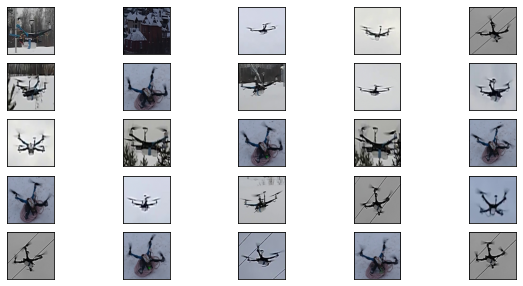

In [9]:
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [10]:
num_classes = 2

# model
model = tf.keras.Sequential([
                             
  tf.keras.layers.Input(shape=(255, 255, 3)),

  tf.keras.layers.Conv2D(8, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2, padding = 'same'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(16, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2, padding = 'same'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(32, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2, padding = 'same'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 8)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 16)      528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                        

In [11]:
model.compile(
  optimizer='Adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
hist = model.fit(
  x_train,
  y_train,
  validation_data=(x_test, y_test),
  validation_split=0.2,
  epochs=20
)

Epoch 1/20
25/25 [==============================] - 57s 2s/step - loss: 0.0514 - accuracy: 0.9835 - val_loss: 0.1341 - val_accuracy: 0.9646
Epoch 2/20
25/25 [==============================] - 28s 1s/step - loss: 0.0486 - accuracy: 0.9797 - val_loss: 0.1242 - val_accuracy: 0.9747
Epoch 3/20
25/25 [==============================] - 28s 1s/step - loss: 0.0595 - accuracy: 0.9822 - val_loss: 0.1608 - val_accuracy: 0.9697
Epoch 4/20
25/25 [==============================] - 29s 1s/step - loss: 0.0459 - accuracy: 0.9810 - val_loss: 0.0894 - val_accuracy: 0.9747
Epoch 5/20
25/25 [==============================] - 29s 1s/step - loss: 0.0454 - accuracy: 0.9848 - val_loss: 0.0839 - val_accuracy: 0.9798
Epoch 6/20
25/25 [==============================] - 28s 1s/step - loss: 0.0462 - accuracy: 0.9848 - val_loss: 0.1068 - val_accuracy: 0.9747
Epoch 7/20
25/25 [==============================] - 30s 1s/step - loss: 0.0526 - accuracy: 0.9848 - val_loss: 0.1306 - val_accuracy: 0.9747
Epoch 8/20
25/25 [==

In [16]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 2s 298ms/step - loss: 0.1114 - accuracy: 0.9798


[0.11139888316392899, 0.9797979593276978]

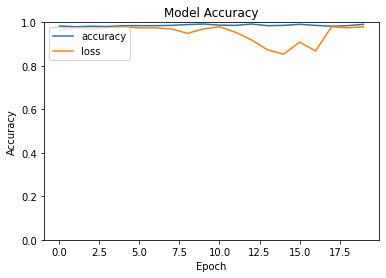

In [17]:
plt.plot(hist.history['accuracy']) #качество обучения нейронной сети
plt.plot(hist.history['val_accuracy']) 
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.legend(['accuracy','loss'], loc = 'upper left')

There are 198 images in the test sample...



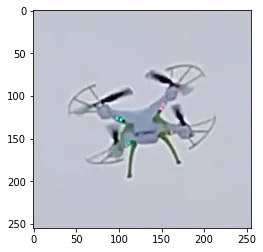

1/1 [==============================] - 0s 245ms/step
0.0 

[ 2.577809  -1.4460707]
['UAV1', 'different2']

It is UAV1


In [18]:
X = 119
print(f"There are {len(x_test)} images in the test sample...\n")
imge = x_test[X]

def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape(255, 255, 3), cmap='gray')
    plt.show()
plot_image(imge)
imge.shape
#model.fit(imge)
predictions = model.predict(np.expand_dims(x_test[X], 0))
print(y_test[X], "\n")
#predictions
print(predictions[0])
print(classes)

cur = predictions[0][0]
cur_num = 0
for i in range(len(classes)):
  if cur < predictions[0][i]:
    cur = predictions[0][i]
    cur_num = i
print(f"\nIt is {classes[cur_num]}")

In [19]:
model.save('/content/drive/MyDrive/MyModel.h5')